<a href="https://colab.research.google.com/github/mnnit3007/ML_Recommendation_system/blob/main/ML_Submission_Template(Recommender_Systems)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised ML - Book Recommendation System
##### **Contribution**    - Individual
##### **Individual Name -** Ayush Kumar Srivastava


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path1="/content/drive/My Drive/Users.csv"
path2="/content/drive/My Drive/Books.csv"
path3="/content/drive/My Drive/Ratings.csv"

Mounted at /content/drive


In [4]:
# Dataset loading
df_users=pd.read_csv(path1)
df_books=pd.read_csv(path2, low_memory=False)
df_ratings=pd.read_csv(path3)

### Dataset First View

In [5]:
#Dataset first view
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [8]:
df_users.shape  #Users dataset rows and columns count

(278858, 3)

In [9]:
df_books.shape  #Books dataset rows and columns count

(271360, 8)

In [10]:
df_ratings.shape  #Ratings dataset rows and columns count

(1149780, 3)

### Dataset Information

In [11]:
df_users.info()  #Users dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
df_books.info()  #Books dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
df_ratings.info()  #Ratings dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [14]:
# Users Dataset Duplicate Value Count
df_users.duplicated().sum()

0

In [15]:
# Books Dataset Duplicate Value Count
df_books.duplicated().sum()

0

In [16]:
# Ratings Dataset Duplicate Value Count
df_ratings.duplicated().sum()

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
df_users.isnull().sum()   #Users dataset null values

User-ID          0
Location         0
Age         110762
dtype: int64

In [18]:
df_books.isnull().sum()   #Books dataset null values

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
df_ratings.isnull().sum()   #Ratings dataset null values

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Text(0.5, 1.0, 'Visualizing Missing Data in Books Dataframe with Seaborn Heatmap')

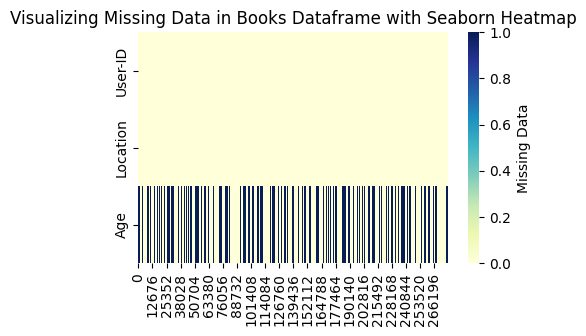

In [20]:
# Visualizing the missing values
#Users dataset
plt.figure(figsize=(5, 3))
sns.heatmap(df_users.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title("Visualizing Missing Data in Books Dataframe with Seaborn Heatmap")

Text(0.5, 1.0, 'Visualizing Missing Data in Books Dataframe with Seaborn Heatmap')

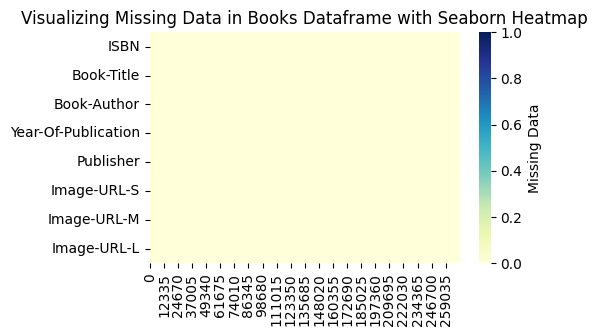

In [21]:
#Books dataset
plt.figure(figsize=(5, 3))
sns.heatmap(df_books.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title("Visualizing Missing Data in Books Dataframe with Seaborn Heatmap")

Text(0.5, 1.0, 'Visualizing Missing Data in Ratings dataframe with Seaborn Heatmap')

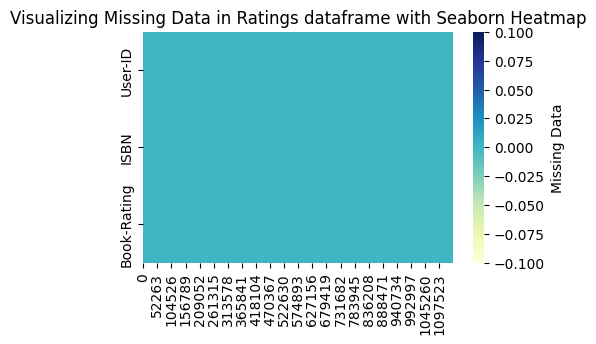

In [22]:
#Ratings dataset
plt.figure(figsize=(5, 3))
sns.heatmap(df_ratings.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title("Visualizing Missing Data in Ratings dataframe with Seaborn Heatmap")

### What did you know about your dataset?

**Three dataframes** present the complete information.They are **'Users','Books' and 'Ratings'.**

**'Users'** dataframe has **278858 rows and 3 columns**.'User-ID' column has int64 datatype, 'Location' column has object datatype, 'Age' column has float64 datatype.There are 110762 null values in the 'Age' column of 'Users' dataframe. Other two columns have no null values.

**'Books'** dataframe has **271360 rows and 8 columns**. All the columns are of object datatype. It has the following columns 'ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M','Image-URL-L'.There are 2 missing values in 'Book-Author' column, 2 missing values in 'Publisher' column and 3 missing values in 'Image-URL-L' column of Books dataframe. Rest columns have no null values.


**Ratings** dataframe has **1149780 rows and 3 columns**.There are no null values in any column. 'User-ID' column has int64 datatype. 'Book-Rating' column has int64 datatype. 'ISBN' column has object datatype.

**No duplicate values** in any dataframe.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df_users.columns #Users dataframe columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [24]:
df_books.columns #Books dataframe columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [25]:
df_ratings.columns #Ratings dataframe columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [26]:
# Dataset Describe
df_users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [27]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [28]:
df_ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


### Variables Description

'Users' dataframe has the following columns: 'User-ID', 'Location', 'Age'.
The numeric features include 'User-ID' and 'Age'. There are total 278858 records indicated by 'User-ID'.The median age is 32, avg age is 34.75, min age is 0 , max age is 244(seems erroneous).Also 'age' feature is skewed due to large ouliers.The 'Location' feature is categorical, with highest freq of 'london, england, united kingdom'.

'Books' dataframe has the follwing columns: 'ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'.All these columns are categorical in nature. Most books Year-Of-Publication is 2002. Top Publisher is Harlequin. Most books are authored by Agatha Christie.

Ratings dataframe has 'ISBN' as categorical column, with top ISBN being 0971880107. User-ID and Book-Rating are numeric columns.The Book-Rating and User-ID  distributions are left skewed.

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable for Users dataframe
df_users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [30]:
# Check Unique Values for each variable for Books dataframe
df_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [31]:
# Check Unique Values for each variable for Ratings dataframe
df_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

**Dealing with missing values and erroneous values in these dataframes**

In [32]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [33]:
#Age being a numeric feature,missng values can be infilled with mean/median
#As large outliers are present, we infill msiing age with median age value # obtained from df.describe function
df_users['Age']=df_users['Age'].fillna(32)

In [34]:
df_users.isna().sum() #Now no missing value in df_users

User-ID     0
Location    0
Age         0
dtype: int64

In [35]:
#df_books
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [36]:
#As only 3 missing values are present in Image-URL-L, 2 msiing values each in Book-Author and Publisher columns, we can safely drop it.
df_books=df_books.dropna()

In [37]:
df_books.isnull().sum() #No missing value present

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [38]:
df_ratings.isnull().sum() #No missing value present

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [39]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [40]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  object
 4   Publisher            271353 non-null  object
 5   Image-URL-S          271353 non-null  object
 6   Image-URL-M          271353 non-null  object
 7   Image-URL-L          271353 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [41]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [42]:
#Changing datatypes of relevant features
df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('float')

In [43]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271353 non-null  object 
 1   Book-Title           271353 non-null  object 
 2   Book-Author          271353 non-null  object 
 3   Year-Of-Publication  271353 non-null  float64
 4   Publisher            271353 non-null  object 
 5   Image-URL-S          271353 non-null  object 
 6   Image-URL-M          271353 non-null  object 
 7   Image-URL-L          271353 non-null  object 
dtypes: float64(1), object(7)
memory usage: 18.6+ MB


## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Creating dataframe with books ISBN and Amazon links
df_link = df_books.loc[ : ,['ISBN','Image-URL-S','Image-URL-M','Image-URL-L']]

In [45]:
#Reducing Books dataframe to relevant columns
df_books = df_books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)

In [46]:
#Merging the columns Users and Ratings
df_allusers = pd.merge(df_users,df_ratings,how='left',on='User-ID')

In [47]:
#Merging books and ratings dataframe
df_allbooks = pd.merge(df_books,df_ratings,how='left',on='ISBN')

In [48]:
df_total=pd.merge(df_allusers,df_books,how='outer',on='ISBN')

In [49]:
#This dataframe includes all users and all movies
df_total

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,1.0,"nyc, new york, usa",32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,"moscow, yukon territory, russia",32.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,"porto, v.n.gaia, portugal",17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,"farnborough, hants, united kingdom",32.0,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,"santa monica, california, usa",61.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1324559,NaN,NaN,NaN,1874166633,NaN,Introducing Nietzsche (Foundations in Children...,Laurence Gane,1998.0,Natl Book Network
1324560,NaN,NaN,NaN,0130897930,NaN,Core Web Programming (2nd Edition),Marty Hall,2001.0,Prentice Hall PTR
1324561,NaN,NaN,NaN,020130998X,NaN,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998.0,Addison-Wesley Professional
1324562,NaN,NaN,NaN,2268032019,NaN,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999.0,Editions du Rocher


In [50]:
#Taking only numeric features from above dataframe
num=df_total.select_dtypes(include=['int','float'])
num

,User-ID,Age,Book-Rating,Year-Of-Publication
0,1.0,32.0,NaN,NaN
1,3.0,32.0,NaN,NaN
2,4.0,17.0,NaN,NaN
3,5.0,32.0,NaN,NaN
4,6.0,61.0,NaN,NaN
...,...,...,...,...
1324559,NaN,NaN,NaN,1998.0
1324560,NaN,NaN,NaN,2001.0
1324561,NaN,NaN,NaN,1998.0
1324562,NaN,NaN,NaN,1999.0


In [51]:
#Most read book titles
pb=df_total.groupby(['ISBN','Book-Title'])['User-ID'].count().reset_index()
pb_desc = pb.sort_values('User-ID',ascending=False)
pb_desc

,ISBN,Book-Title,User-ID
216734,0971880107,Wild Animus,2502
38729,0316666343,The Lovely Bones: A Novel,1295
71056,0385504209,The Da Vinci Code,883
7378,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
32497,0312195516,The Red Tent (Bestselling Backlist),723
...,...,...,...
270417,9507397426,El Diario de Adan y Eva,0
210538,0929587081,Men and Brethren,0
178743,0809239876,Toyland: The High-Stakes Game of the Toy Industry,0
194760,0863183530,Breast Feeding Your Baby,0


In [52]:
#Which publisher publised most books
pbl=df_total.groupby('Publisher')['ISBN'].count().reset_index()
pbl_desc=pbl.sort_values('ISBN',ascending=False)
pbl_desc

,Publisher,ISBN
1391,Ballantine Books,34732
11761,Pocket,31998
1717,Berkley Publishing Group,28621
15930,Warner Books,25513
6582,Harlequin,25038
...,...,...
7851,Jeremy Books,1
7856,Jessica Kingsley Pub,1
7859,Jester Pr,1
7860,Jewish Contemporary Classics,1


In [53]:
#Count of authors
at=df_total.groupby('Book-Author')['ISBN'].count().reset_index()
at_desc=at.sort_values('ISBN',ascending=False)
at_desc

,Book-Author,ISBN
91185,Stephen King,10055
73339,Nora Roberts,8429
48984,John Grisham,6010
42992,James Patterson,5845
66429,Mary Higgins Clark,4778
...,...,...
56322,Kori S. Voorhees,1
15532,Chris Martindale,1
56324,Kornei Chukovsky,1
56325,Kornel Terplan,1


In [54]:
#Distribution of location of users
lc=df_total.groupby('Location')['User-ID'].count().reset_index()
lc_desc=lc.sort_values('User-ID',ascending=False)
lc_desc


,Location,User-ID
51109,"toronto, ontario, canada",17732
34529,"n/a, n/a, n/a",13629
29056,"london, england, united kingdom",9731
37875,"ottawa, ontario, canada",9684
10820,"chicago, illinois, usa",9563
...,...,...
24218,"jenson beach, florida, usa",1
24219,"jeonju, n/a, south korea",1
24220,"jepara, jateng, indonesia",1
24221,"jerago con orago, lombardia, italy",1


In [55]:
#Users who have read most books in descending order
br=df_total.groupby('User-ID')['ISBN'].count().reset_index()
br_desc=br.sort_values('ISBN',ascending=False)
br_desc


,User-ID,ISBN
11675,11676.0,13602
198710,198711.0,7550
153661,153662.0,6109
98390,98391.0,5891
35858,35859.0,5850
...,...,...
114843,114844.0,0
114847,114848.0,0
114848,114849.0,0
114850,114851.0,0


In [56]:
#Which books recieved max avg ratings
d=df_total.groupby(['ISBN','Book-Title'])['Book-Rating'].mean().reset_index()
d_top=d.sort_values('Book-Rating',ascending=False)
d_top

,ISBN,Book-Title,Book-Rating
200948,0880889187,Poor Richards Almanack,10.0
205453,0893012513,Mountain Man: A Novel of Male and Female in th...,10.0
74132,0394605039,Death Comes for the Archbishop,10.0
85998,0440175801,Saigon,10.0
210418,0925279730,Benjamin Rush,10.0
...,...,...,...
271052,9836247416,Institusi pentadbiran undang-undang &amp; keha...,NaN
271081,9871138261,Navegaciones y Regresos,NaN
271087,9875451495,Los Mitos de La Historia Argentina,NaN
271100,9879317114,Historia del Tiempo - del Big Bang a Los Aguje...,NaN


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chat - 1 User-ID_Histplot

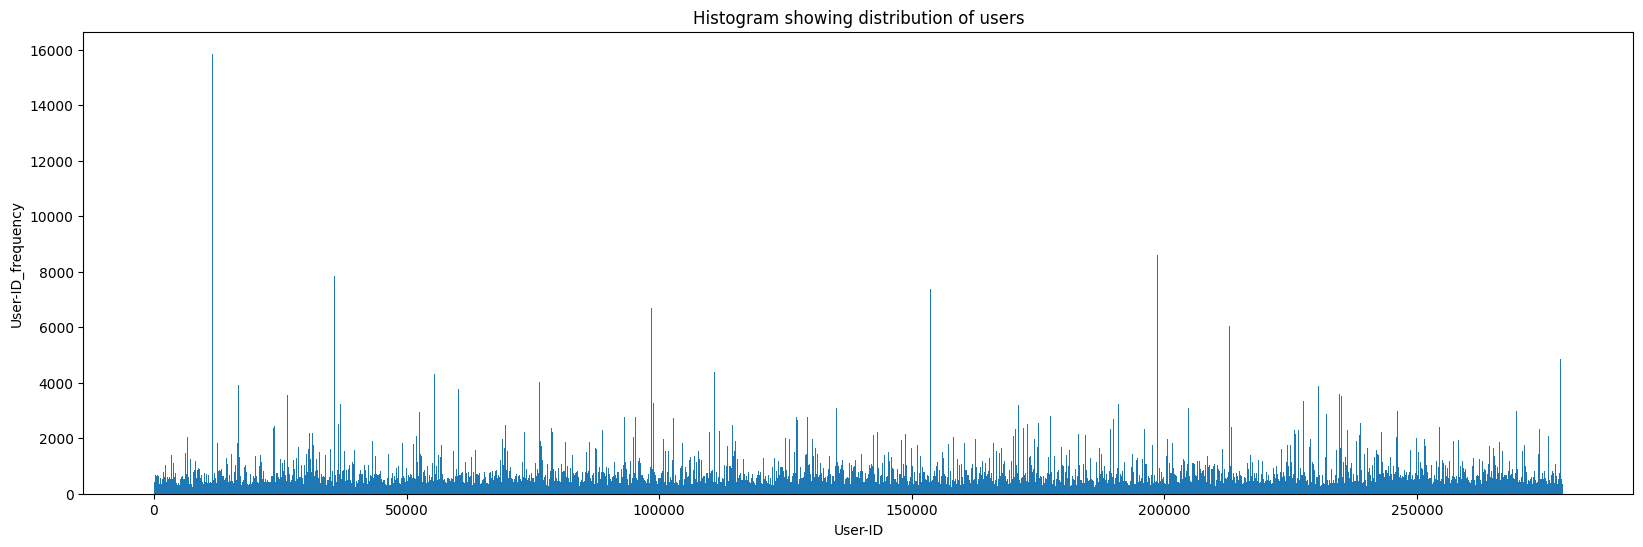

In [57]:
plt.figure(figsize=(20,6))
plt.hist(df_total['User-ID'],bins=1500)
plt.xlabel('User-ID')
plt.ylabel('User-ID_frequency')
plt.title("Histogram showing distribution of users")
plt.show()


##### 1. Why did you pick the specific chart?

The distribution of 'User-ID' was desired. As its numeric in nature, histogram present the relevant insights.

##### 2. What is/are the insight(s) found from the chart?

1.	User-ID column shows near uniform distribution.
2.	Some minor variations exist like user-id near 12k have read most books.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chat - 2 User-ID_Boxplot

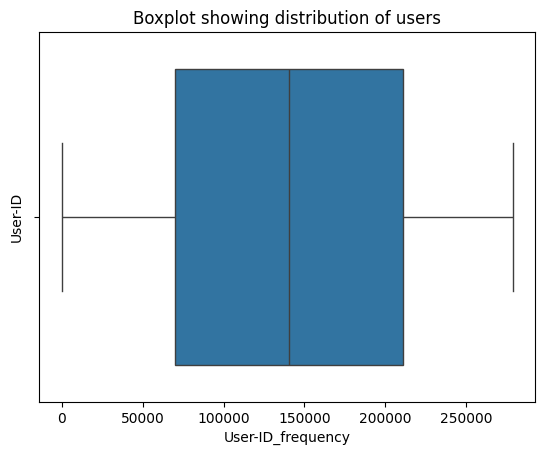

In [58]:
sns.boxplot(data=df_total,x='User-ID')
plt.ylabel('User-ID')
plt.xlabel('User-ID_frequency')
plt.title("Boxplot showing distribution of users")
plt.show()

##### 1. Why did you pick the specific chart?

The distribution of 'User-ID' was desired. As its numeric in nature, boxplot present the relevant insights.

##### 2. What is/are the insight(s) found from the chart?

1.	Most user-ids are confined in range of 60000 to 210000.
2.	No outlier found.
3.	Median User-Id is 140000


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Location

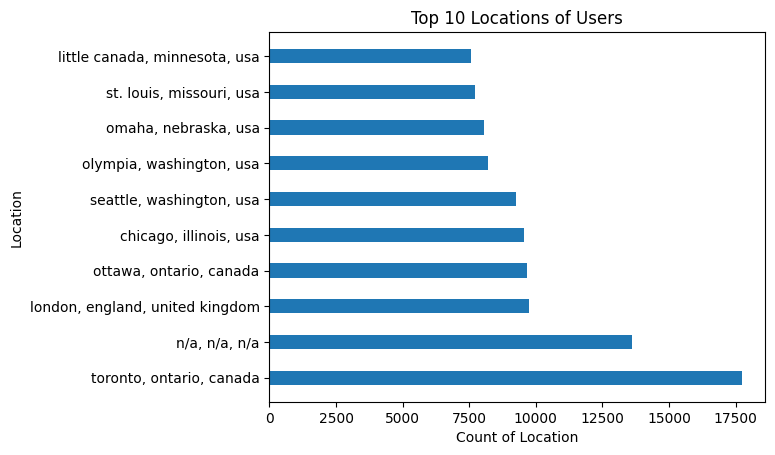

In [59]:
# Countplot of Top 10 Location of Users (who read and not read books)
plt.barh(y=lc_desc['Location'][0:10],width=lc_desc['User-ID'][0:10],height=0.4)
plt.ylabel('Location')
plt.xlabel('Count of Location')
plt.title("Top 10 Locations of Users")
plt.show()

##### 1. Why did you pick the specific chart?

Matplotlib Horizontal bar charts are preferred as we want to display count of categorical features.Countplot is resourse intensive to develop given large dataframe.

##### 2. What is/are the insight(s) found from the chart?

1.	Most users are from Toronto, Ontario, Canada.
2.	Many users location is unknown.
3.	Most other users are from UK, Canada and USA.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Book-Rating

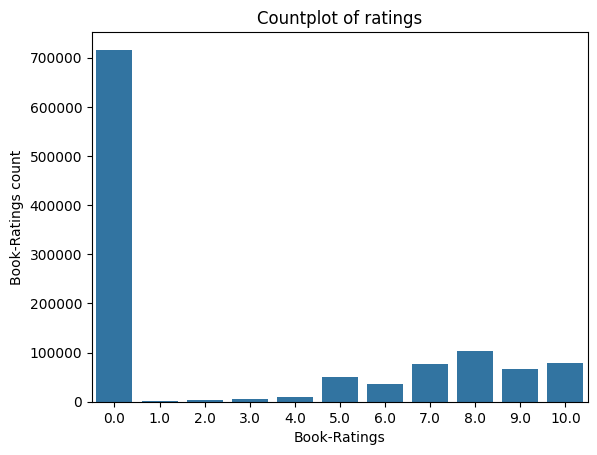

In [60]:
# Chart - 3 visualization code
#Countplot of ratings
sns.countplot(data=df_total,x='Book-Rating')
plt.xlabel('Book-Ratings')
plt.ylabel('Book-Ratings count')
plt.title('Countplot of ratings')
plt.show()

##### 1. Why did you pick the specific chart?

As there are limited no. of categories in Book-Ratings feature, so seaborn countplot is found suitable for the purpose.

##### 2. What is/are the insight(s) found from the chart?

1. Most titles have received 0 ratings(implicit and not rated).
2. Among explicit ratings, most books have received 8 ratings, followed by 7, 10 and 9.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Book-Author

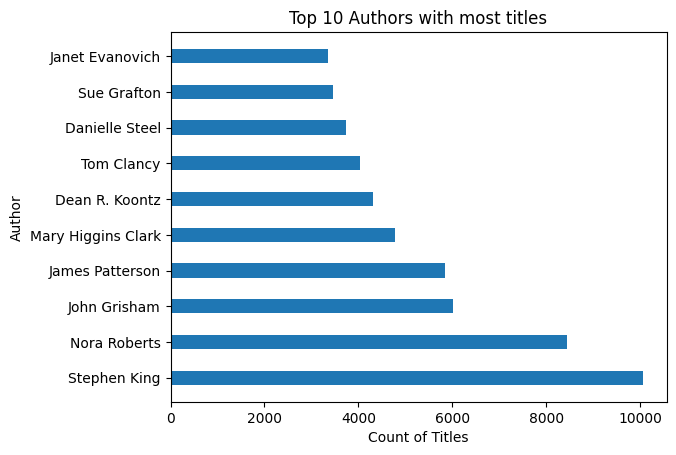

In [61]:
# Chart - 4 visualization code
#Top 10 Authors with most titles
plt.barh(y=at_desc['Book-Author'][0:10],width=at_desc['ISBN'][0:10],height=0.4)
plt.ylabel('Author')
plt.xlabel('Count of Titles')
plt.title("Top 10 Authors with most titles")
plt.show()


##### 1. Why did you pick the specific chart?

Matplotlib Horizontal bar charts are preferred as we want to display count of categorical features.Countplot is resourse intensive to develop given large dataframe.

##### 2. What is/are the insight(s) found from the chart?

1. Stephan King authored most book titles(nearly 10000).
2. Many authors also authored a single title.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Publisher

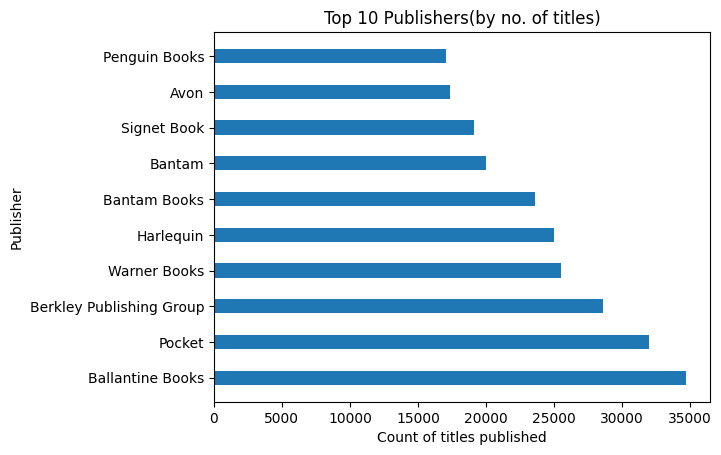

In [62]:
# Chart - 5 visualization code
#Top 10 publishers with most titles
plt.barh(y=pbl_desc['Publisher'][0:10],width=pbl_desc['ISBN'][0:10],height=0.4)
plt.ylabel('Publisher')
plt.xlabel('Count of titles published')
plt.title("Top 10 Publishers(by no. of titles)")
plt.show()

##### 1. Why did you pick the specific chart?

Matplotlib Horizontal bar charts are preferred as we want to display count of categorical features.Countplot is resourse intensive to develop given large dataframe.

##### 2. What is/are the insight(s) found from the chart?

1. Ballantine Books published most titles(nearly 35000).
2. Some publishers published a single book.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Age_Histplot

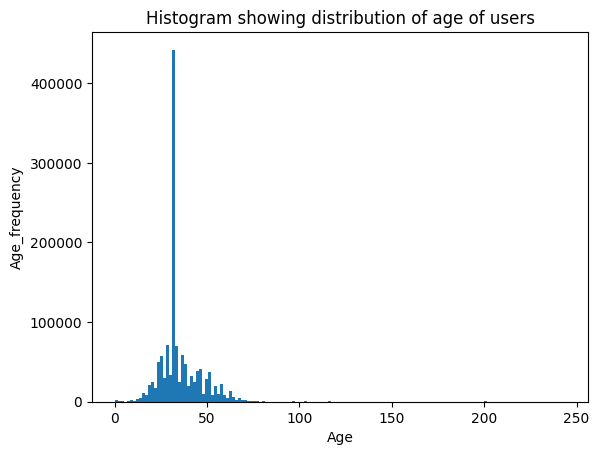

In [63]:
# Chart - 6 visualization code
# Age distribution of Users
plt.hist(df_total['Age'],bins=150)
plt.xlabel('Age')
plt.ylabel('Age_frequency')
plt.title("Histogram showing distribution of age of users")
plt.show()

##### 1. Why did you pick the specific chart?

As 'Age' is a numeric feature.Hence its distribution is plotted on histogram.

##### 2. What is/are the insight(s) found from the chart?

1. Feature 'Age' follows near normal distribution.
2. 'Age' is rightly skewed and slightly leptokurtic, showing clustering around the mode at 35 yrs'Age'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Age_Boxplot

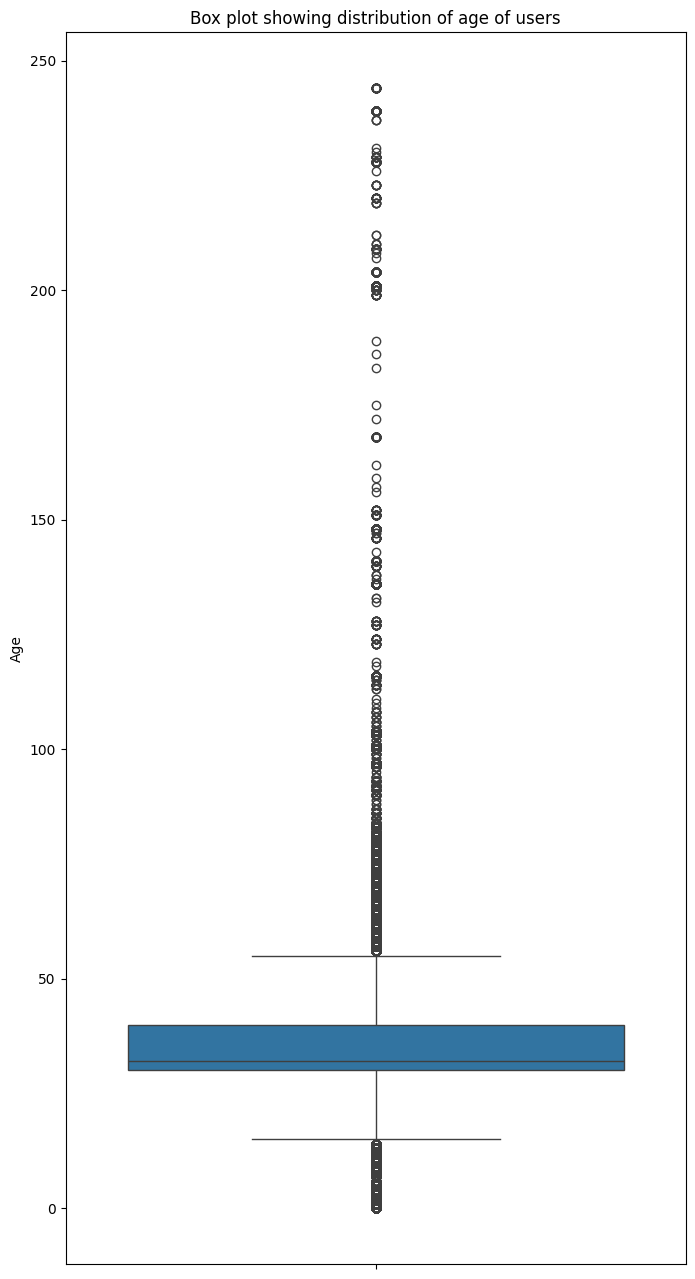

In [64]:
#Identifying age distribution of users
plt.figure(figsize=(8,16))
sns.boxplot(df_total['Age'])
plt.title('Box plot showing distribution of age of users')
plt.show()

##### 1. Why did you pick the specific chart?

As 'Age' is a numeric feature. Hence its distribution is plotted on boxplot. It is used to visualize the nature of distribution.

##### 2. What is/are the insight(s) found from the chart?

1. Few ouliers exist that of age beyond(near 60 yrs and less than near 10 yrs of age).
2. Median age if users is 35-40 age gp.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 Year-Of-Publication

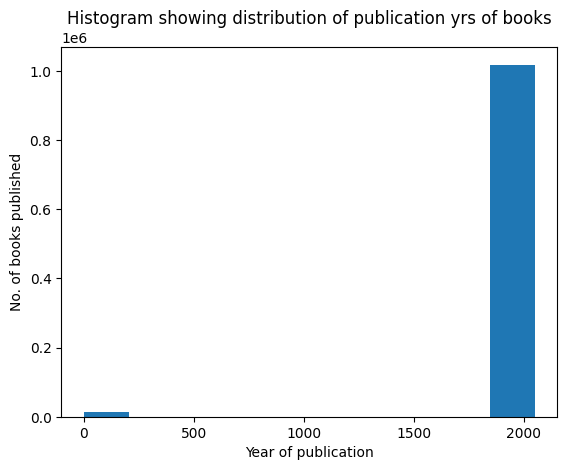

In [65]:
# Chart - 7 visualization code
#Histogram showing distribution of Publication years of books
plt.hist(df_total['Year-Of-Publication'],bins=10)
plt.xlabel('Year of publication')
plt.ylabel('No. of books published')
plt.title("Histogram showing distribution of publication yrs of books")
plt.show()


##### 1. Why did you pick the specific chart?

As 'Year Of Publication' is a numeric feature. Hence its distribution is plotted on histogram.

##### 2. What is/are the insight(s) found from the chart?

1. Distribution is heavily left skewed.
2. Some outliers can be seen.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 Year-Of-Publication

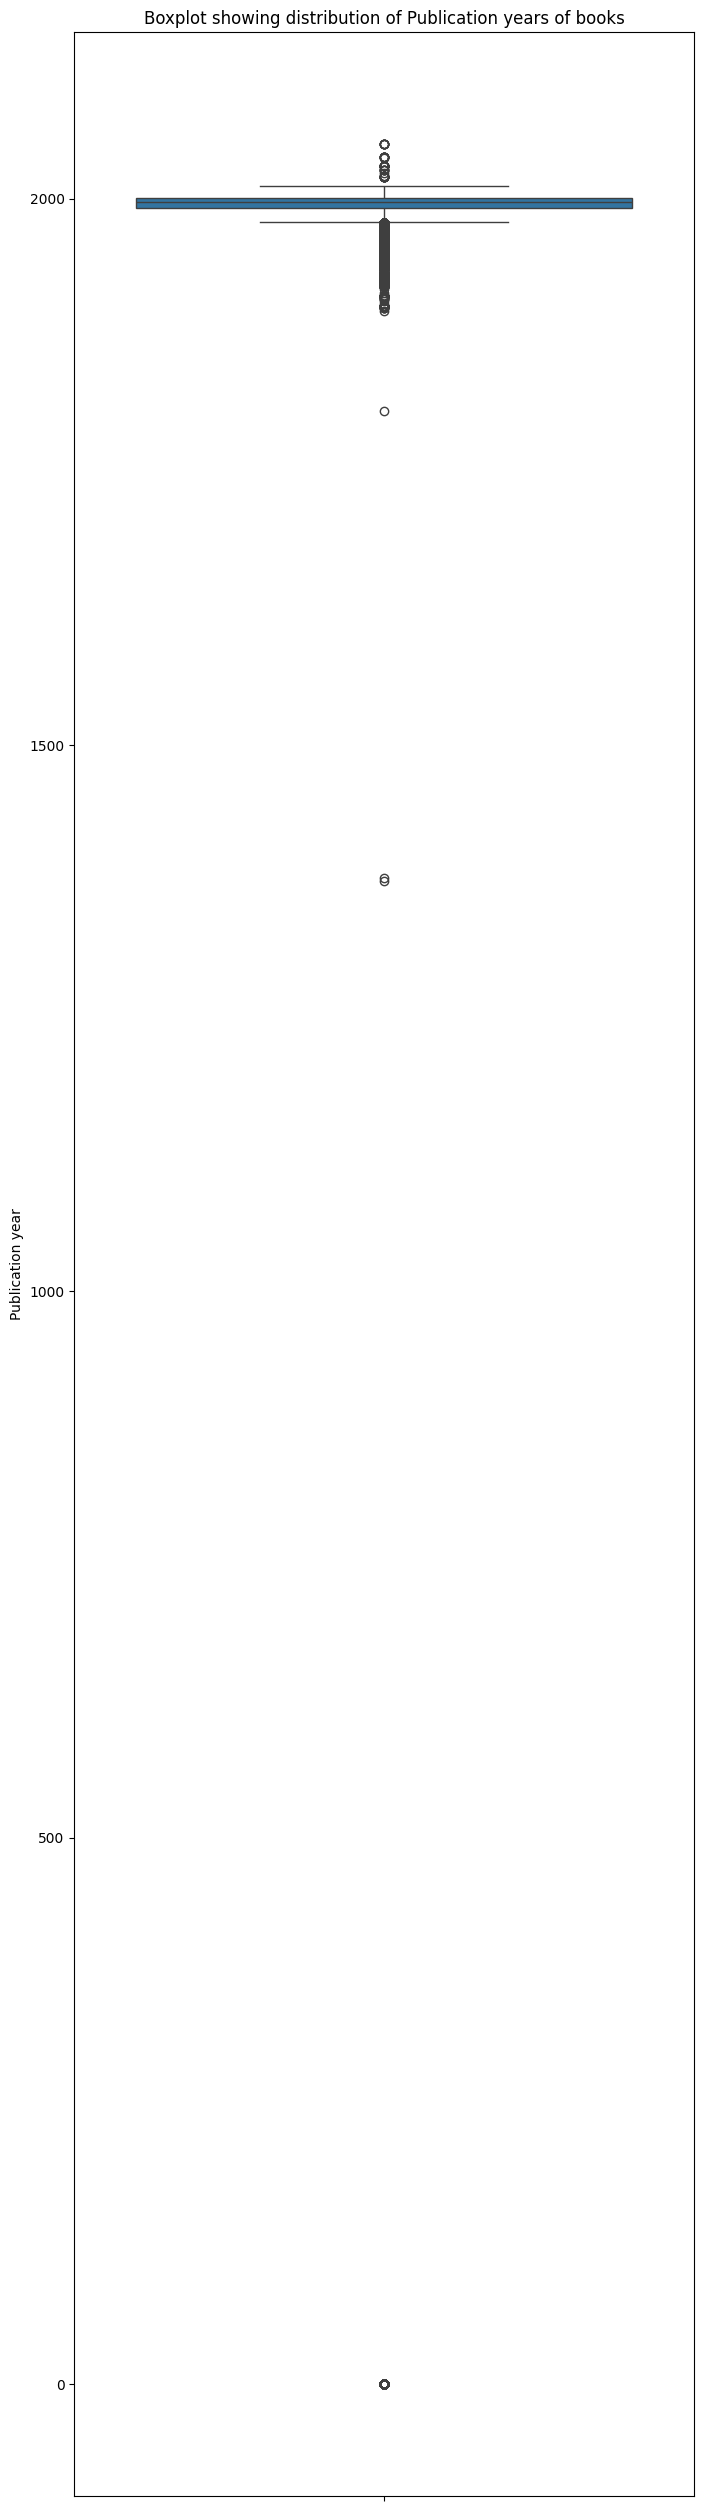

In [66]:
plt.figure(figsize=(8,32))
sns.boxplot(df_total['Year-Of-Publication'])
plt.ylabel('Publication year')
plt.title("Boxplot showing distribution of Publication years of books")
plt.show()

##### 1. Why did you pick the specific chart?

As 'Year Of Publication' is a numeric feature. A boxplot is used to visualize the nature of distribution.

##### 2. What is/are the insight(s) found from the chart?

1. Most books have 1990s-2000s as publication years.
2. Distribution indicated clustering of values around mode.
3. Median yr is just less than 2000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 ISBN/Book-Title

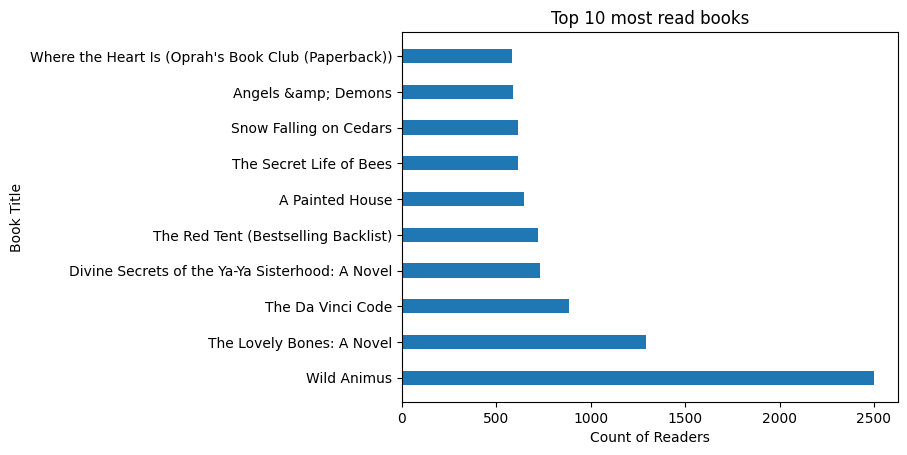

In [67]:
# Top 10 available books(Title)
plt.barh(y=pb_desc['Book-Title'][0:10],width=pb_desc['User-ID'][0:10],height=0.4)
plt.ylabel('Book Title')
plt.xlabel('Count of Readers')
plt.title("Top 10 most read books")
plt.show()

##### 1. Why did you pick the specific chart?

Matplotlib Horizontal bar charts are preferred as we want to display count of categorical features.Countplot is resourse intensive to develop given large dataframe.

##### 2. What is/are the insight(s) found from the chart?

1. Most read ISDN is 0971880107.
2. Most read Book Title is Wild Animus.
3. There are few ISDN and Titles which are not read by anyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Top 10 book readers

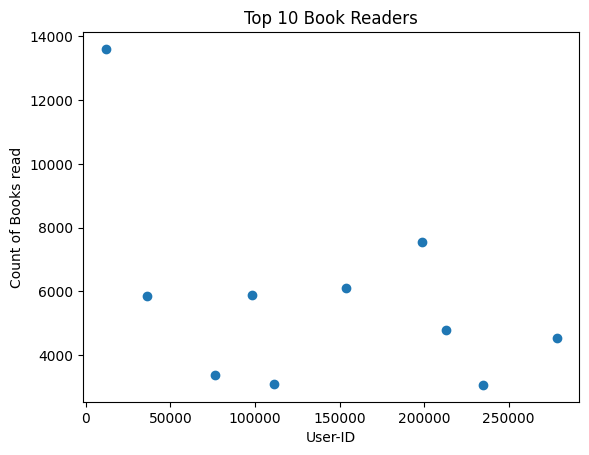

In [68]:
# Chart - 9 visualization code
# Top 10 Book Readers
plt.scatter(x = (br_desc['User-ID'][0:10]), y=(br_desc['ISBN'][0:10]))
plt.xlabel('User-ID')
plt.ylabel('Count of Books read')
plt.title("Top 10 Book Readers")
plt.show()



##### 1. Why did you pick the specific chart?

Scatter plot was chosen, as both the features are numeric in nature.The no. of books read and User-Id of top 10 readers can be clearly found from the plot.

##### 2. What is/are the insight(s) found from the chart?

1. Only top 5 readers have read more than 6000 books.
2. The one who has read most books is disproportionately more than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 Correlation between various ratings and age

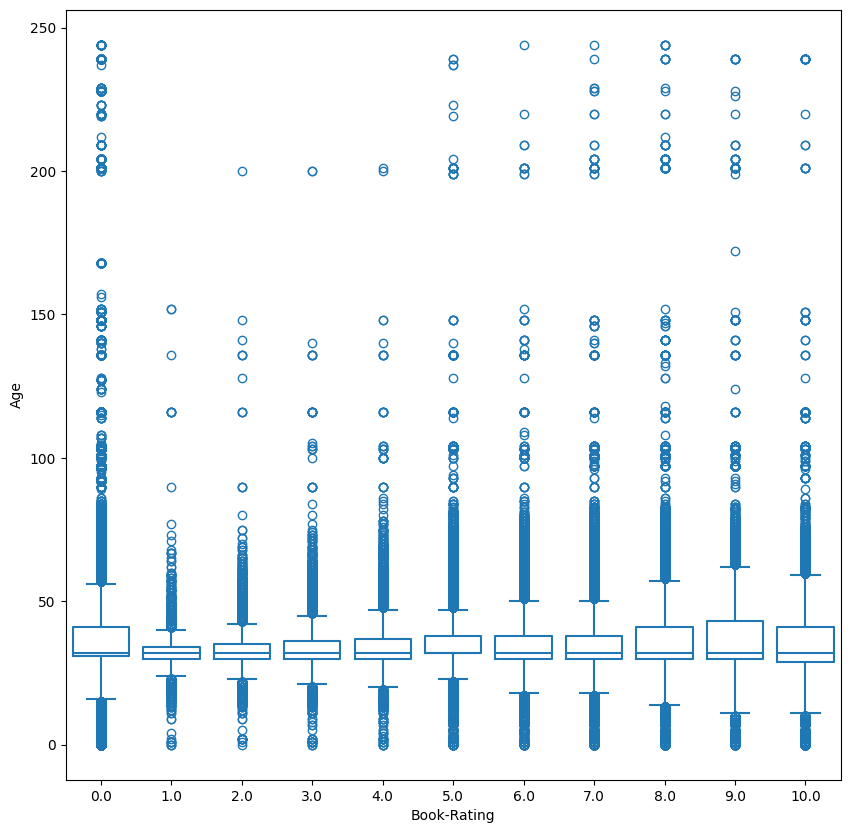

In [69]:
# Chart - 10 visualization code
plt.figure(figsize=(10,10))
sns.boxplot(data=df_total, y='Age', x='Book-Rating',fill=False)
plt.show()

##### 1. Why did you pick the specific chart?

We intend to compare the distribution of ages corresponding to various book ratings. Box plot is appropriate for the purpose given limited categories of ratings.

##### 2. What is/are the insight(s) found from the chart?

1. Ratings=0,8,9,10 given by wider range of age groups.Mainly people over 50 have rated them.
2. Most widest ages gps can be found rating a book as 9.0
3. Very narrow age range people rated 1 or 2.Mostly people in age range(30-40).Densely clustered.
4. Median age group for all ratings is near 32-35.
5. All ratings include a significant no. of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

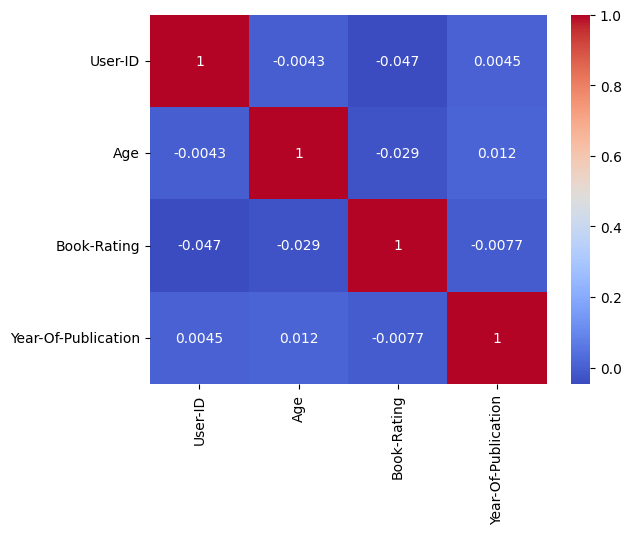

In [70]:
# Correlation Heatmap visualization code
sns.heatmap(num.corr(),annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

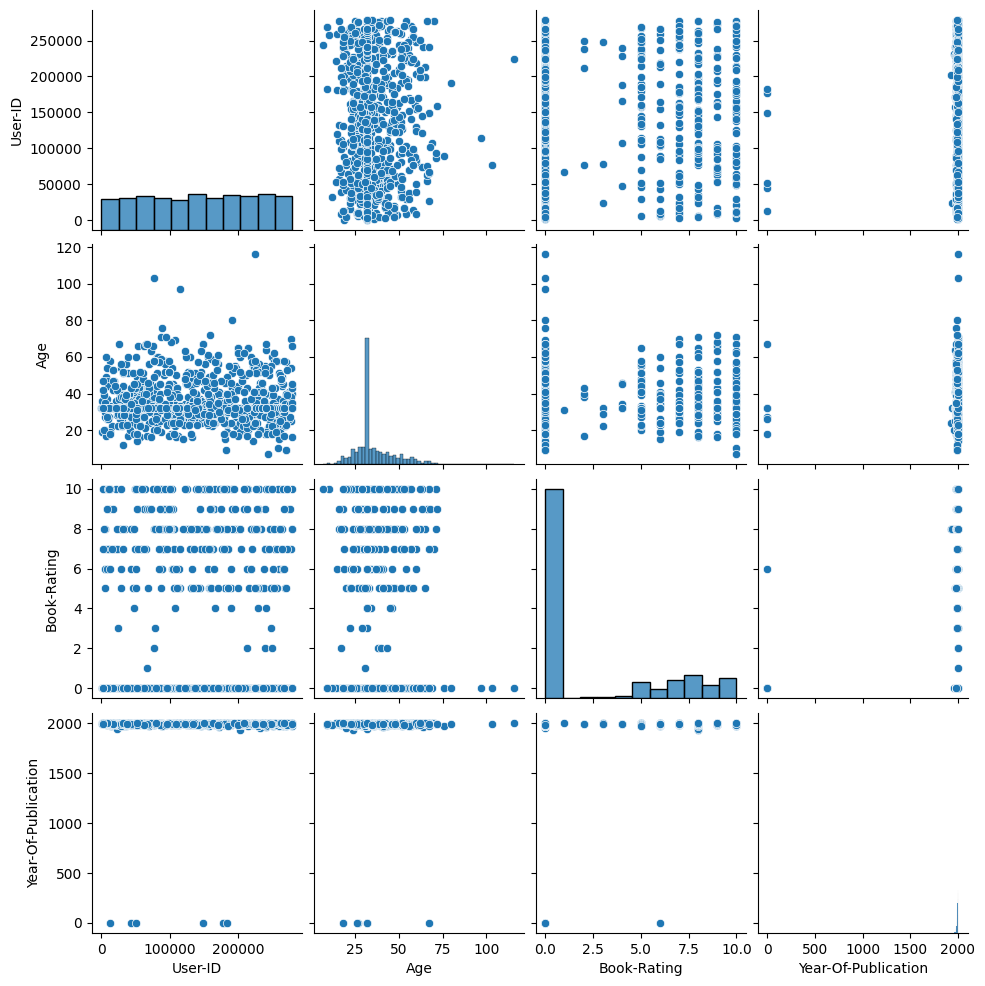

In [71]:
# Pair Plot visualization code
import random
num_sample=random.sample(range(len(df_total)),1000)
sns.pairplot(data=num.iloc[num_sample])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

In [72]:
df_total.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,1.0,"nyc, new york, usa",32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,"moscow, yukon territory, russia",32.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,"porto, v.n.gaia, portugal",17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,"farnborough, hants, united kingdom",32.0,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,"santa monica, california, usa",61.0,NaN,NaN,NaN,NaN,NaN,NaN


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [73]:
# Null Hyphothesis H0: The mean Age of book reader is = 35.(H0: Age = 35),
# Alternate Hyphothesis: (H1: Age != 35)

In [74]:
df_total['Age'].describe()

count    1.323355e+06
mean     3.551298e+01
std      1.227208e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.200000e+01
75%      4.000000e+01
max      2.440000e+02
Name: Age, dtype: float64

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Significance value
alpha   = .05 #One tailed test

#Critical value
critical_value = stats.norm.ppf(alpha/2)

#Compute the test statistic
t_statistic, p_value = stats.ttest_1samp(df_total['Age'], popmean=40)

# Step 4: Calculate T-statistic manually
m = np.mean(df_total['Age'])
s = np.std(df_total['Age'])  # using ddof=1 for sample standard deviation
n = len(df_total['Age'])
t_statistic_manual = m / (s / np.sqrt(n))

# Step 5: Decision
if p_value <= alpha:
    decision = "Reject"
else:
    decision = "Fail to reject"

# Conclusion
if decision == "Reject":
    conclusion = "There is statistically significant evidence that the average blood pressure before and after treatment with the new drug is different."
else:
    conclusion = "There is insufficient evidence to claim a significant difference in average blood pressure before and after treatment with the new drug."

# Display results
print("T-statistic (from scipy):", t_statistic)
print("P-value (from scipy):", p_value)
print("T-statistic (calculated manually):", t_statistic_manual)
print(f"Decision: {decision} the null hypothesis at alpha={alpha}.")
print("Conclusion:", conclusion)

T-statistic (from scipy): nan
P-value (from scipy): nan
T-statistic (calculated manually): 3330.4697302626805
Decision: Fail to reject the null hypothesis at alpha=0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average blood pressure before and after treatment with the new drug.


As p value is 0, which is less than .05(alpha), we reject the null hyphothesis. Thus the mean age of readers is not 32.

##### Which statistical test have you done to obtain P-Value?

One sample T-Test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [77]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [78]:
# Handling Missing Values & Missing Value Imputation
df_users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [79]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [80]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

All missing values are dealt with before EDA.
1. Users Dataframe
Age column has missing values. As the column also has outliers, we used median to infill the missing values.
2. Books Dataframe
As only 3 missing values are present in Image-URL-L, 2 msiing values each in Book-Author and Publisher columns, we can safely drop it.
3. Ratings Dataframe has no missing values.

### 2. Handling Outliers

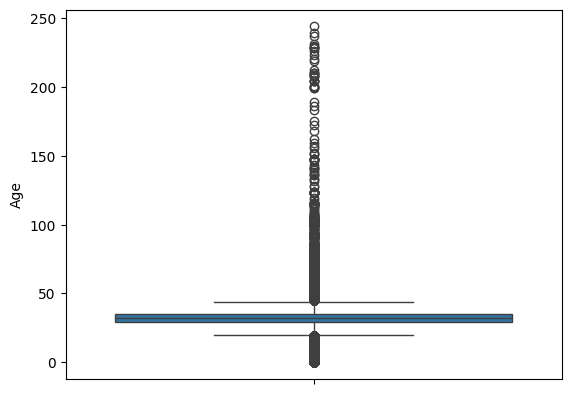

In [81]:
# Handling Outliers & Outlier treatments
#Visualizing numeric column outliers
sns.boxplot(data=df_users['Age'])
plt.show()

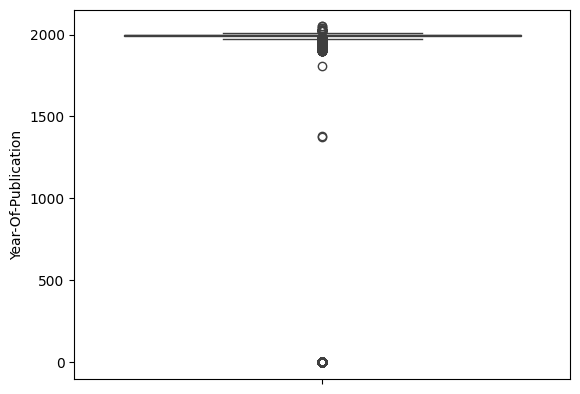

In [82]:
sns.boxplot(data=df_books['Year-Of-Publication'])
plt.show()

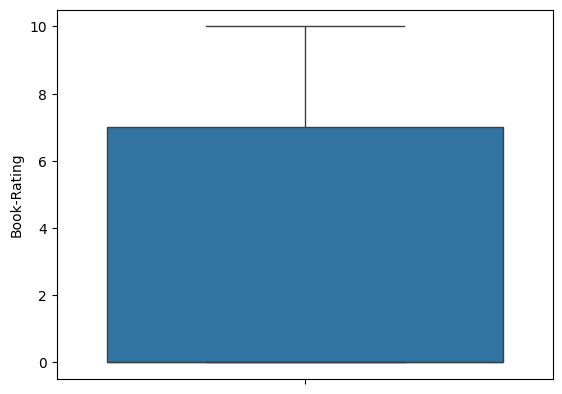

In [83]:
sns.boxplot(data=df_ratings['Book-Rating'])
plt.show()

**So, Outliers are present in 'Age' and 'Year of Publication' columns. No outlier is present among Book-ratings.**

**Outlier Treatment**

In [84]:
# IQR Outlier Removal
out=num[['Age','Year-Of-Publication']]
#Age outliers
q1 = out['Age'].quantile(0.25)
q3 = out['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = out['Age'][((out['Age'] < lower_bound) | (out['Age'] > upper_bound))]

print("\n 'Age' Outliers detected using IQR Outlier Removal:")
print(outliers_iqr)

#Year-Of-Publication outliers
q1 = out['Year-Of-Publication'].quantile(0.25)
q3 = out['Year-Of-Publication'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr2 = out['Year-Of-Publication'][((out['Year-Of-Publication'] < lower_bound) | (out['Year-Of-Publication'] > upper_bound))]

print("\n 'Year-Of-Publication' Outliers detected using IQR Outlier Removal:")
print(outliers_iqr2)


 'Age' Outliers detected using IQR Outlier Removal:
4          61.0
5          14.0
22         14.0
39         57.0
65         57.0
           ... 
1321872    57.0
1321873    57.0
1323266    12.0
1323302    74.0
1323325    63.0
Name: Age, Length: 98202, dtype: float64

 'Year-Of-Publication' Outliers detected using IQR Outlier Removal:
179908     1978.0
179909     1978.0
179910     1978.0
179911     1978.0
179912     1978.0
            ...  
1324454    1966.0
1324467       0.0
1324474    1978.0
1324475    1973.0
1324510    1977.0
Name: Year-Of-Publication, Length: 44328, dtype: float64


**As 'Age' is a personal attribute and year of publication is factual in nature, we do not discard all the outliers.We only act for any error.**

**We replace 0 or -ve values in Year of Publication or Age with median values.**

In [85]:
num[num['Age']<=0]

,User-ID,Age,Book-Rating,Year-Of-Publication
140,220.0,0.0,NaN,NaN
308,470.0,0.0,NaN,NaN
368,562.0,0.0,NaN,NaN
2592,4042.0,0.0,NaN,NaN
3586,5570.0,0.0,NaN,NaN
...,...,...,...,...
1318134,271896.0,0.0,0.0,NaN
1318135,271896.0,0.0,0.0,NaN
1318136,271896.0,0.0,0.0,NaN
1318137,271896.0,0.0,0.0,NaN


In [86]:
#Replacing 0 as age with median age
df_users['Age'] = df_users['Age'].replace(0,np.median(df_users['Age']))

In [87]:
num[num['Year-Of-Publication']<=0]

,User-ID,Age,Book-Rating,Year-Of-Publication
186144,183.0,27.0,8.0,0.0
186145,73681.0,27.0,8.0,0.0
186146,92005.0,24.0,9.0,0.0
186147,156089.0,38.0,0.0,0.0
186148,174962.0,20.0,0.0,0.0
...,...,...,...,...
1324324,NaN,NaN,NaN,0.0
1324326,NaN,NaN,NaN,0.0
1324336,NaN,NaN,NaN,0.0
1324361,NaN,NaN,NaN,0.0


In [88]:
#Replacing (['Year-Of-Publication']<=0) with median 'Year-Of-Publication'
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].replace(0,np.median(df_books['Year-Of-Publication']))

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. We visualised the numeric features for outliers using boxplot.
2. Next, we used IQR based outlier detection techinque and found ouliers in ['Age'] and ['Year-Of-Publication'] columns.
3. Some outliers were retained, others were replaced with median based on problem statement.

This has been done because outliers are important for business decision(recommendations).


### 3. Categorical Encoding

In [89]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [90]:
# Expand Contraction
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.5 MB/s eta 0:00:00


In [91]:
import contractions

In [92]:
#Function to expand contractions of desired columns.
def expand(s):
  expanded=contractions.fix(s)
  return expanded

In [93]:
df_users['Location']=df_users['Location'].map(expand)
df_books['Book-Title']=df_books['Book-Title'].map(expand)
df_books['Book-Author']=df_books['Book-Author'].map(expand)
df_books['Publisher']=df_books['Publisher'].map(expand)


#### 3. Removing Punctuations

In [94]:
# Remove Punctuations
import string

#Function to remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [95]:
df_users['Location']=df_users['Location'].map(remove_punctuations)
df_books['Book-Title']=df_books['Book-Title'].map(remove_punctuations)
df_books['Book-Author']=df_books['Book-Author'].map(remove_punctuations)
df_books['Publisher']=df_books['Publisher'].map(remove_punctuations)

In [96]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P O Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo DEste,1991.0,HarperPerennial
3,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E J W Barber,1999.0,W W Norton amp Company
...,...,...,...,...,...
271355,0440400988,There is a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub Mm
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books
271357,006008667X,Lily Dale The True Story of the Town that Tal...,Christine Wicker,2004.0,HarperSanFrancisco
271358,0192126040,Republic Worlds Classics,Plato,1996.0,Oxford University Press


#### 4. Removing URLs & Removing words and digits contain digits.

In [97]:
df_link

,ISBN,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...
271355,0440400988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [98]:
# Remove URLs
#Removing URLs
df_link['Image-URL-S'] = df_link['Image-URL-S'].str.replace(r'http\S+|www\S+', '', regex=True)
df_link['Image-URL-M'] = df_link['Image-URL-M'].str.replace(r'http\S+|www\S+', '', regex=True)
df_link['Image-URL-L'] = df_link['Image-URL-L'].str.replace(r'http\S+|www\S+', '', regex=True)

In [99]:
# Remove words and digits contain digits
import string
def remove_digits(text):
    for digit in string.digits:
        text = str(text).replace(digit, '')
    return text

def remove_letters(text):
    for letter in string.ascii_letters:
        text = str(text).replace(letter, '')
    return text

In [100]:
df_users['User-ID']=df_users['User-ID'].map(remove_letters)
df_users['Location']=df_users['Location'].map(remove_digits)
df_users['Age']=df_users['Age'].map(remove_letters)

df_books['Book-Title']=df_books['Book-Title'].map(remove_digits)
df_books['Book-Author']=df_books['Book-Author'].map(remove_digits)
df_books['Publisher']=df_books['Publisher'].map(remove_digits)
df_books['ISBN']=df_books['ISBN'].map(remove_letters)
df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].map(remove_letters)

df_ratings['ISBN']=df_ratings['ISBN'].map(remove_letters)
df_ratings['User-ID']=df_ratings['User-ID'].map(remove_letters)
df_ratings['Book-Rating']=df_ratings['Book-Rating'].map(remove_letters)

df_link['ISBN']=df_link['ISBN'].map(remove_letters)

#### 4. Converting to lower case.

In [101]:
df_users['Location']=df_users['Location'].map(lambda x:x.lower())
df_books['Book-Title']=df_books['Book-Title'].map(lambda x:x.lower())
df_books['Book-Author']=df_books['Book-Author'].map(lambda x:x.lower())
df_books['Publisher']=df_books['Publisher'].map(lambda x:x.lower())

#### 5. Removing White spaces

In [102]:
# Remove White spaces
def remove_white_spaces(s):
  return s.strip()

In [103]:
df_users['Location']=df_users['Location'].map(remove_white_spaces)
df_books['Book-Title']=df_books['Book-Title'].map(remove_white_spaces)
df_books['Book-Author']=df_books['Book-Author'].map(remove_white_spaces)
df_books['Publisher']=df_books['Publisher'].map(remove_white_spaces)

#### 6. Rephrase Text

In [104]:
# Rephrase Text
# Transforming to lower case


#### 7. Tokenization

In [105]:
# Tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [106]:
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    return ' '.join(tokens)

In [107]:
df_users['Location']=df_users['Location'].map(preprocess)
df_books['Book-Title']=df_books['Book-Title'].map(preprocess)
df_books['Book-Author']=df_books['Book-Author'].map(preprocess)
df_books['Publisher']=df_books['Publisher'].map(preprocess)

In [108]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,classical mythology,mark p o morford,2002.0,oxford university press
1,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada
2,0060973129,decision in normandy,carlo deste,1991.0,harperperennial
3,0374157065,flu the story of the great influenza pandemic ...,gina bari kolata,1999.0,farrar straus giroux
4,0393045218,the mummies of urumchi,e j w barber,1999.0,w w norton amp company
...,...,...,...,...,...
271355,0440400988,there is a bat in bunk five,paula danziger,1988.0,random house childrens pub mm
271356,0525447644,from one to one hundred,teri sloat,1991.0,dutton books
271357,006008667,lily dale the true story of the town that talk...,christine wicker,2004.0,harpersanfrancisco
271358,0192126040,republic worlds classics,plato,1996.0,oxford university press


#### 10. Text Vectorization

In [109]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [110]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
df_books['Vector']=df_books['Book-Title']+df_books['Book-Author']+df_books['Publisher']+df_books['Year-Of-Publication']

In [111]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_books['Vector'][0:20000])

In [112]:
tfidf_matrix

<20000x48857 sparse matrix of type '<class 'numpy.float64'>'
	with 118866 stored elements in Compressed Sparse Row format>

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [113]:
# Manipulate Features to minimize feature correlation and create new features
# Country feature: Extracting country for each user
def country(s):
  st=s.split(' ')
  return st[-1]

In [114]:
df_users['Country']=df_users['Location'].map(country)

In [115]:
df_users

,User-ID,Location,Age,Country
0,1,nyc new york usa,32.0,usa
1,2,stockton california usa,18.0,usa
2,3,moscow yukon territory russia,32.0,russia
3,4,porto vngaia portugal,17.0,portugal
4,5,farnborough hants united kingdom,32.0,kingdom
...,...,...,...,...
278853,278854,portland oregon usa,32.0,usa
278854,278855,tacoma washington united kingdom,50.0,kingdom
278855,278856,brampton ontario canada,32.0,canada
278856,278857,knoxville tennessee usa,32.0,usa


In [116]:
#As Age ranges from 1-100, categorising it into 1. Age<=18, 2. Age in (18-60), 3.Age>=60
def Age_categ(s):
  if float(s)<18:
    return 'minor'
  elif 18<=float(s)<60:
    return 'adult'
  else:
    return 'elderly'

In [117]:
df_users['Age-Group']=df_users['Age'].map(Age_categ)

In [118]:
df_users

,User-ID,Location,Age,Country,Age-Group
0,1,nyc new york usa,32.0,usa,adult
1,2,stockton california usa,18.0,usa,adult
2,3,moscow yukon territory russia,32.0,russia,adult
3,4,porto vngaia portugal,17.0,portugal,minor
4,5,farnborough hants united kingdom,32.0,kingdom,adult
...,...,...,...,...,...
278853,278854,portland oregon usa,32.0,usa,adult
278854,278855,tacoma washington united kingdom,50.0,kingdom,adult
278855,278856,brampton ontario canada,32.0,canada,adult
278856,278857,knoxville tennessee usa,32.0,usa,adult


#### 2. Feature Selection

In [119]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [120]:
# Transform Your data


### 6. Data Scaling

In [121]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [122]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [123]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [124]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Content(Book title) based recommendation

In [277]:
# ML Model - 1 Implementation
# Compute similarity matrix
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [278]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df_books.loc[df_books['Book-Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 similar books
    book_indices = [i[0] for i in sim_scores]
    return df_books['Book-Title'].iloc[book_indices]


In [279]:
# Example: Get recommendations for a book(give name in lower case)
book_title = 'the mummies of urumchi'
recommended_books = get_recommendations(book_title)
print(f"Recommended books for '{book_title}':")
print(recommended_books)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.9999999999999998), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.02530683350695397), (22, 0.0), (23, 0.03665807398372269), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.03724486913459629), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.03303894015301079), (84, 0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Content based recommendation for user of particular age in a particular location.

In [125]:
# Merge ratings and users data to get location information for each book
df_allbooks = df_users.merge(df_ratings,on='User-ID',how='left')
df_total = df_allbooks.merge(df_books,on='ISBN',how='left')

In [126]:
df_total=df_total[['User-ID','Country', 'Age', 'Age-Group','ISBN','Book-Rating','Book-Title']]

In [127]:
df_total[['User-ID','Book-Rating', 'Age']]=df_total[['User-ID','Book-Rating','Age']].astype(float)

In [128]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337841 entries, 0 to 1337840
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1337841 non-null  float64
 1   Country      1337841 non-null  object 
 2   Age          1337841 non-null  float64
 3   Age-Group    1337841 non-null  object 
 4   ISBN         1164266 non-null  object 
 5   Book-Rating  1164266 non-null  float64
 6   Book-Title   1046259 non-null  object 
dtypes: float64(3), object(4)
memory usage: 71.4+ MB


In [129]:
# Calculate the average rating for each Country
country_avg_ratings = df_total.groupby('Country')['Book-Rating'].mean().reset_index()

In [130]:
# Calculate the average rating for each Age group
age_avg_ratings = df_total.groupby('Age-Group')['Book-Rating'].mean().reset_index()

In [158]:
df_total[df_total['Country']=='india']

,User-ID,Country,Age,Age-Group,ISBN,Book-Rating,Book-Title
179,101.0,india,26.0,adult,NaN,NaN,NaN
445,193.0,india,23.0,adult,0971880107,0.0,wild animus
476,218.0,india,41.0,adult,NaN,NaN,NaN
488,229.0,india,22.0,adult,NaN,NaN,NaN
490,231.0,india,32.0,adult,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1328516,277223.0,india,32.0,adult,NaN,NaN,NaN
1328534,277233.0,india,26.0,adult,NaN,NaN,NaN
1328693,277352.0,india,23.0,adult,NaN,NaN,NaN
1330529,277822.0,india,32.0,adult,NaN,NaN,NaN


In [173]:
pd.DataFrame(df_total['ISBN'].unique()).head(5)

,0
0,NaN
1,0195153448
2,034542252
3,0002005018
4,0060973129


In [174]:
# Define a function to recommend top-rated books at a given location
def recommend_books_by_location(user_id, age, country, top_n=5):

    # Filter books by age_group
    age_group = df_total[df_total['Age'] == age].iloc[0]['Age-Group']
    age_books = df_total[df_total['Age-Group'] == age_group]

    # Further Filter books of the specified location
    location_books = age_books[age_books['Country'] == location]

    # Exclude books the user has already rated
    user_rated_books = df_ratings[df_ratings['User-ID'] == user_id]['ISBN']
    location_books = location_books[~location_books['ISBN'].isin(user_rated_books)]

    # Remove Nan values
    location_books  = location_books[location_books.notna()]

    #Deduplicate
    location_books  = location_books.drop_duplicates()

    # Sort books by average rating in descending order
    location_books = location_books.sort_values('Book-Rating', ascending=False)

    # Get the top N recommended books ISBN
    top_recommendations = list(location_books['Book-Title'].head(top_n))
    return top_recommendations

In [176]:
# Example: Get top 5 book recommendation
user_id = 231
age = 32
location = 'india'
recommendations = recommend_books_by_location(user_id, age, country)
print(f"Top 5 Book Recommendations 'in {location} for {age} year old User' {user_id}: {recommendations}")

Top 5 Book Recommendations 'in india for 32 year old User' 231: ['the living planet a portrait of the earth', 'expert c programming', 'one', 'the alienist', 'world in equilibrium an alternative approach to the theory of emergence of species']


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Collaborative filtering

In [180]:
# ML Model - 3 Implementation
df_ratings[['Book-Rating','User-ID']] = df_ratings[['Book-Rating','User-ID']].astype(float)

In [181]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User-ID      10000 non-null  float64
 1   ISBN         10000 non-null  object 
 2   Book-Rating  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [182]:
df_ratings.shape

(10000, 3)

In [183]:
# Create a user-item rating matrix
user_item_matrix = pd.pivot_table(df_ratings, values='Book-Rating', index='User-ID', columns='ISBN', fill_value=0)

In [184]:
user_item_matrix

ISBN,,00007,0002005018,0002231115,0002232766,0002240114,000225669,000254794,0002558122,0002740230,...,9729801320,9729817715,9729852405,9748440537,9782253172109,9782264014184,9782922145441,9788401499883,9871138016,9995585227
User-ID,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278849.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity = pd.DataFrame(user_similarity)
user_similarity

,0,1,2,3,4,5,6,7,8,9,...,931,932,933,934,935,936,937,938,939,940
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Define the user ID and number of top recommendations
user_id = 10
top_n = 1

# Adjust for 0-based indexing to get similarity scores for the target user
target_user_similarity = user_similarity.loc[(user_id)]
target_user_similarity  = pd.DataFrame(target_user_similarity, index=list(user_item_matrix.index))
print("Target User Similarity Scores:", target_user_similarity)

# Get the user's ratings
user_ratings = user_item_matrix.loc[(user_id)]
print("User Ratings:", user_ratings)

# Initialize an empty list to store recommendations
recommendations = []

# Iterate over each movie
for book_id in user_item_matrix.columns:
    # Skip movies the user has already rated
    if user_ratings[book_id] > 0:
        continue

    # Calculate the weighted sum of ratings for this movie based on user similarity
    # This is done by iterating over each user and multiplying their similarity score with the target user by their rating for the movie.
    weighted_sum = sum(target_user_similarity.loc[other_user_id] * user_item_matrix.loc[other_user_id][book_id] for other_user_id in list(user_item_matrix.index))/len(target_user_similarity)

    # Calculate the average similarity score for the current movie.
    #This is done by summing the similarity scores of all users who have rated the movie and dividing by the count of such users.
    rated_users_similarity_sum = sum(target_user_similarity.loc[other_user_id]
                                     for other_user_id in user_item_matrix.index
                                     if user_item_matrix.loc[other_user_id, book_id] > 0)
    try:
      average_similarity = rated_users_similarity_sum / len([other_user_id for other_user_id in user_item_matrix.index
                                                            if user_item_matrix.loc[other_user_id][book_id] > 0])
    except ZeroDivisionError:
      average_similarity = 0

    # Calculate the predicted rating for this movie
    if ((average_similarity > 0) == 1):
      predicted_rating = (weighted_sum / average_similarity)
    else:
      predicted_rating = 0

    print("Book ID:", book_id)
    print("Weighted Sum:", weighted_sum)
    print("Rated Similairty Sum:", rated_users_similarity_sum)
    print("Average Similarity:", average_similarity)
    print("Predicted Rating:", predicted_rating)

    # Add the movie ID and predicted rating to the recommendations list
    recommendations.append((book_id, predicted_rating))

Target User Similarity Scores:            10
2.0       0.0
7.0       0.0
8.0       0.0
9.0       0.0
10.0      0.0
...       ...
278846.0  NaN
278849.0  NaN
278851.0  NaN
278852.0  NaN
278854.0  NaN

[941 rows x 1 columns]
User Ratings: ISBN
                 0.0
00007            0.0
0002005018       0.0
0002231115       0.0
0002232766       0.0
                ... 
9782264014184    0.0
9782922145441    0.0
9788401499883    0.0
9871138016       0.0
9995585227       0.0
Name: 10.0, Length: 9338, dtype: float64
Book ID: 
Weighted Sum: 10   NaN
dtype: float64
Rated Similairty Sum: 0
Average Similarity: 0
Predicted Rating: 0
Book ID: 00007
Weighted Sum: 10   NaN
dtype: float64
Rated Similairty Sum: 0
Average Similarity: 0
Predicted Rating: 0


In [190]:
# Define a function to get movie recommendations for a user
def get_recommendations(user_id, top_n=5):
    # Get the similarity scores for the target user
    target_user_similarity = user_similarity[: ,[user_id - 1]]  # Adjust for 0-based indexing

    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]

    # Initialize an empty list to store recommendations
    recommendations = []

    # Iterate over each movie
    for book_id in user_item_matrix.columns:
        # Skip movies the user has already rated
        if user_ratings[book_id] > 0:
            continue

        # Calculate the weighted sum of ratings for this movie based on user similarity
        weighted_sum = sum(target_user_similarity[other_user_id - 1] * user_item_matrix.loc[other_user_id, book_id]
                           for other_user_id in user_item_matrix.index)/len(target_user_similarity)

        # Calculate the average similarity score for this movie
        rated_users_similarity_sum = sum(target_user_similarity[other_user_id - 1]
                                         for other_user_id in user_item_matrix.index
                                         if user_item_matrix.loc[other_user_id, book_id] > 0)
        average_similarity = rated_users_similarity_sum / len([other_user_id for other_user_id in user_item_matrix.index
                                                                if user_item_matrix.loc[other_user_id, book_id] > 0])

        # Calculate the predicted rating for this movie
        predicted_rating = weighted_sum / average_similarity if average_similarity > 0 else 0

        # Add the movie ID and predicted rating to the recommendations list
        recommendations.append((book_id, predicted_rating))

    # Sort recommendations by predicted rating in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommended movie IDs
    top_recommendations = [book_id for book_id, _ in recommendations[:top_n]]
    return top_recommendations

In [191]:
# Example: Get movie recommendations
get_recommendations(11400, top_n=5)

KeyError: (slice(None, None, None), [11399])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***